In [2]:
import matplotlib.pyplot as plt
import networkx as nx

In [20]:
g = {
    'E': ['C', 'H'],
    'C': ['B', 'D'],
    'G': ['H'],
    'B': [],
    'D': ['H'],
    'H': ['I']
}

initial = 'E'
goal = 'H'

In [21]:
G = nx.DiGraph(g)
pos = nx.spring_layout(G)

In [31]:
def IDDFS(g, start, target):
    depth = 0
    bottom_reached = False
    while not bottom_reached:
        path = []
        result, finalPath, bottom_reached = _IDDFS(g, start, target, 0, depth, path)
        if result is not None:
            return result, finalPath
        depth += 1
        print("Increasing depth to " + str(depth))
    return None

def _IDDFS(g, node, target, current_depth, max_depth, path):
    print("Visiting Node " + node)
    path.append(node)
    if node == target:
        print("Found the node we're looking for!")
        return node, path, True
    if current_depth == max_depth:
        print("Current maximum depth reached, returning...")
        if len(g[node]) > 0:
            return None, [], False
        else:
            return None, [], True

    bottom_reached = True
    for i in range(len(g[node])):
        result, recPath, bottom_reached_rec = _IDDFS(g, g[node][i], target, current_depth + 1, max_depth, path)
        if result is not None:
            return result, recPath, True
        bottom_reached = bottom_reached and bottom_reached_rec
    return None, [], bottom_reached

Visiting Node E
Current maximum depth reached, returning...
Increasing depth to 1
Visiting Node E
Visiting Node C
Current maximum depth reached, returning...
Visiting Node H
Found the node we're looking for!


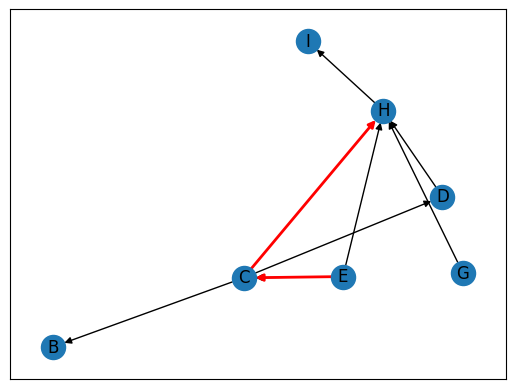

In [33]:
result, path = IDDFS(g, initial, goal) # The required depth is 3 so it will work.
edgelist = [[path[i], path[i+1]] for i in range(len(path)-1)]
nx.draw_networkx(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=edgelist, edge_color='r', width=2)
plt.show()